<a href="https://colab.research.google.com/github/gohibi/pythonbases/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import math



In [5]:
data={'X':[39,42,53,70,75,90,110,115,150,170],
      'Y':[1.3,1.3,0.9,2.2,2.2,2.2,2.8,2.4,2.5,2.6]}
data=pd.DataFrame(data)
display(data)

,X,Y
0,39,1.3
1,42,1.3
2,53,0.9
3,70,2.2
4,75,2.2
5,90,2.2
6,110,2.8
7,115,2.4
8,150,2.5
9,170,2.6


1.	Построить корреляционное поле. По характеру расположения точек в корреляционном поле выбрать вид регрессии.

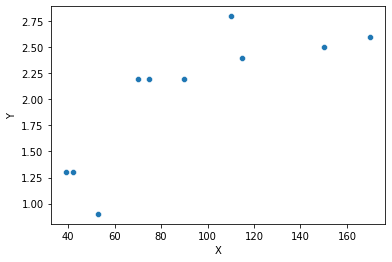

In [6]:
ax=sns.scatterplot(x=data['X'],y=data['Y'],data=data)


1.	Вычислить числовые характеристики 



In [8]:
n=len(data)
print(n)

10


In [9]:
Som_X=data['X'].sum()
print('Som X =',Som_X)

Som X = 914


In [10]:
Som_Y=data['Y'].sum()
print('Som Y =',Som_Y)

Som Y = 20.400000000000002


In [11]:
X_mean=Som_X/n
print(f'X_mean={X_mean}')

X_mean=91.4


In [12]:
Y_mean=Som_Y/n
print(f'Y_mean={Y_mean}')

Y_mean=2.04


In [13]:
sum_x=sum((data['X']-X_mean)**2)
Sx=np.sqrt(sum_x/(n-1))
print(f'Sx={Sx}')

Sx=44.60244138808747


In [16]:
sum_y=sum((data['Y']-Y_mean)**2)
Sy=np.sqrt(sum_y/(n-1))
print(f'Sy={Sy}')

Sy=0.6415259585983684


In [17]:
r=data['X'].corr(data['Y'])
print('r =',r)

r = 0.8016383315855075


In [ ]:
if r<0:
  print('отрицательной корреляции.')
else:
  print('положительной корреляции величин X, Y')
print()
print( '0.75 <',r,'< 0.95','линейной связи сильная')


положительной корреляции величин X, Y

0.75 < 0.8016383315855075 < 0.95 линейной связи сильная


3. Определить значимость коэффициента корреляции rи найти для него доверительный интервал с надежностью γ=0,95

In [18]:
t=(abs(r)*np.sqrt(n-2))/(np.sqrt(1-r**2))
alpha=0.05
tkp=stats.t.ppf(1-alpha/2, n-2)
if t<tkp :
  print(f'гипотеза Н0 принимается :{t}<{tkp}')
else:
  print(f' гипотеза Н0 отклоняется :{t}>{tkp}')
arctanh_r =np.arctanh(r)
u=norm.cdf(1-0.05/2)
left_ro=arctanh_r - (u/np.sqrt(n-3))
right_ro=arctanh_r + (u/np.sqrt(n-3))
print(np.tanh(left_ro),'< ro <', np.tanh(right_ro))

 гипотеза Н0 отклоняется :3.7928073689828925>2.3060041350333704
0.656988432539882 < ro < 0.8893615550845253


4.Найти эмпирическое уравнение регрессий Y на Х и X на Y. Проверить гипотезы о значимости коэффициентов регрессии и построить доверительные интервалы для них

In [19]:
print('уравнение регрессий Y на Х : y = a+bx')
b= r*(Sy/Sx)
a=Y_mean-(r*(Sy/Sx)*(X_mean))
print('y ={}+{}x'.format(a.round(3),b.round(3)))

уравнение регрессий Y на Х : y = a+bx
y =0.986+0.012x


In [82]:
print('уравнение регрессий X на Y : x = a+by')
bb=round((r*(Sx/Sy)),3)
aa=round((X_mean - (r*(Sx/Sy)*Y_mean)),3)
print(f'x={aa}+{bb}y')

уравнение регрессий X на Y : x = a+by
x=-22.298+55.734y


In [126]:
Tb=stats.t.ppf((1+alpha)/2, n-2)
s=Sx
sm=[round(np.power((data.loc[i,'Y']-a-(b*data.loc[i,'X'])),2),6) for i in range(len(data))]
S_2=round(sum(sm)/(n-2),6)
print(S_2)
S=np.sqrt(S_2)
Sbeta = S/(s**2*np.sqrt(n-1))
print(f'{(b-(Tb*Sbeta)).round(6)}  < beta < {(b+(Tb*Sbeta)).round(6)}')

0.165465
0.011526  < beta < 0.011535


In [127]:
Steta=S*np.sqrt((1/n)+(X_mean/((n-1)*s**2)))
print(f'{(a-(Tb*Steta)).round(6)} < teta < {(a+(Tb*Steta)).round(6)}')

0.977614 < teta < 0.994679


5. Вычислить коэффициент детерминации R2 и объяснить его смысловое значение.

In [20]:
#f=0.986+0.012x
f=[0.986 + 0.012 * data.loc[i, 'X'] for i in range(len(data))]
data['f']=f




In [21]:
data

,X,Y,f
0,39,1.3,1.454
1,42,1.3,1.490
2,53,0.9,1.622
3,70,2.2,1.826
4,75,2.2,1.886
5,90,2.2,2.066
6,110,2.8,2.306
7,115,2.4,2.366
8,150,2.5,2.786
9,170,2.6,3.026


In [22]:
#R² = 1 – (Sum of 1 to n de (y_i – f(x_i))**2)/(Sum of 1 to n de (y_i – y_bar)**2)

SCR = sum((data['Y'].values-data['f'].values)**2)
SCT = sum((data['Y'].values-Y_mean)**2)

In [23]:
SCR

1.3459919999999994

In [24]:
SCT

3.703999999999999

In [40]:
R_2=round((1-(SCR/SCT)),6)
print(f'коэффициент детерминации R2 = {R_2} \n')
print('Значение R2 должно находиться в диапазоне от нуля до единицы: 0 ≤ R2 ≤ 1 \n')
print('Модель считается более качественной, если значение коэффициента детерминации близко к 1 \n')
print('R² приближается к 1, облако точек сужается вокруг линии регрессии и зависимость сильная.')


коэффициент детерминации R2 = 0.636611 

Значение R2 должно находиться в диапазоне от нуля до единицы: 0 ≤ R2 ≤ 1 

Модель считается более качественной, если значение коэффициента детерминации близко к 1 

R² приближается к 1, облако точек сужается вокруг линии регрессии и зависимость сильная.


6.	Проверить адекватность уравнения регрессии Y на X.


In [46]:
import scipy.stats
#y =0.986+0.012x
Fвыб = (R_2*(n-2)/(1-R_2)).round(6)
Fкр = scipy.stats.f.isf(0.05, 1, n-2).round(6)



In [47]:
Fвыб

14.014976

In [48]:
Fкр


5.317655

In [49]:
print(f'{Fвыб} > {Fкр} ')
print(f'делаем вывод о том, что полученное уравнение линейной регрессии y =0.986+0.012x статистически значимо описывает результаты эксперимента.')

14.014976 > 5.317655 
делаем вывод о том, что полученное уравнение линейной регрессии y =0.986+0.012x статистически значимо описывает результаты эксперимента.
